## Quiz #0502

### "Human Activity Recognition" 

#### Answer the following questions by providing Python code:
#### Objectives:
- Carry out the EDA.
- Carry out the data pre-processing.
- Optimize and test a predictive model of your choice.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).

In [2]:
# Go to the directory where the data file is located. 
os.chdir(r'Data')                # Please, replace the path with your own. 

In [3]:
df = pd.read_csv('data_human activity recognition.csv', header='infer')

In [4]:
df.shape

(19622, 160)

In [5]:
df.columns

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=160)

1). Carry out the EDA. Check for the missing values. HINT: The response variable is 'classe'.

In [6]:
print(df.classe)

0        A
1        A
2        A
3        A
4        A
        ..
19617    E
19618    E
19619    E
19620    E
19621    E
Name: classe, Length: 19622, dtype: object


In [7]:
df.shape

(19622, 160)

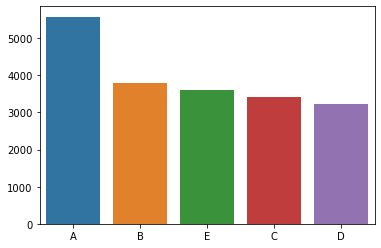

In [8]:
freqs = df.classe.value_counts()
sns.barplot(freqs.index, freqs.values,ci=None)
plt.show()

In [9]:
pd.isnull(df).mean(axis=0)

Unnamed: 0              0.0
user_name               0.0
raw_timestamp_part_1    0.0
raw_timestamp_part_2    0.0
cvtd_timestamp          0.0
                       ... 
accel_forearm_z         0.0
magnet_forearm_x        0.0
magnet_forearm_y        0.0
magnet_forearm_z        0.0
classe                  0.0
Length: 160, dtype: float64

2). Get rid of the columns that have more than 97% missing values.

In [10]:
df = df.loc[:, df.isnull().mean() < 0.97]
df

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19617,19618,adelmo,1322832937,588376,02/12/2011 13:35,no,864,147.00,-34.80,129.0,...,1.73,-1.75,-0.25,-271,-68,-37,-205,-587.0,6.0,E
19618,19619,adelmo,1322832937,596287,02/12/2011 13:35,no,864,145.00,-35.30,130.0,...,1.59,-1.36,0.00,-271,-91,-43,-151,-635.0,-36.0,E
19619,19620,adelmo,1322832937,636283,02/12/2011 13:35,no,864,145.00,-35.50,130.0,...,1.54,-1.20,0.05,-263,-99,-45,-116,-654.0,-70.0,E
19620,19621,adelmo,1322832937,964299,02/12/2011 13:35,no,864,143.00,-35.90,131.0,...,1.48,-0.90,0.05,-270,-141,-51,-68,-678.0,-98.0,E


In [11]:
df.shape # Ahora tenemos 60 columnas en lugar de 160.

(19622, 60)

3). Get rid of the unnecessary columns. HINT: Those columns with "time" in the name and those that are obviously unnecessary.

In [12]:
time_cols = [col for col in df.columns if 'time' in col]
print(time_cols)

['raw_timestamp_part_1', 'raw_timestamp_part_2', 'cvtd_timestamp']


In [13]:
df = df.drop(columns = time_cols) #Eliminamos las columnas que contienen "time" en el nombre

In [17]:
df.columns #Chequeamos el resto de columnas en busca de las innecesarias

Index(['Unnamed: 0', 'user_name', 'new_window', 'num_window', 'roll_belt',
       'pitch_belt', 'yaw_belt', 'total_accel_belt', 'gyros_belt_x',
       'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x', 'accel_belt_y',
       'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z',
       'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x',
       'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x', 'accel_arm_y',
       'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z',
       'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z'

In [18]:
df = df.drop(columns = ['Unnamed: 0', 'user_name', 'new_window'])

In [19]:
df.shape #Pasamos de 160 a 54 tras limpiar totalmente los datos

(19622, 54)

4). Label encode the responde variable. HINT: use preprocessing.LabelEncoder(). 

In [20]:
LE = preprocessing.LabelEncoder()
X = np.array(df.drop(columns='classe'))
Y = np.array(df.loc[:,'classe'])
Y = LE.fit_transform(Y)

5). Carry out min-max scaling of the exploratory variables. HINT: use preprocessing.MinMaxScaler().

In [21]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

6). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s)
- Calculate the accuracy.
- Aim for upper 90% accuracy.

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [36]:
# Aplicamos KNN.
k_grid = np.arange(1,11,1)
parameters = {'n_neighbors':k_grid}

In [37]:
# Optimizamos la k
gridCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, n_jobs = -1)
gridCV.fit(X_train, Y_train)
best_k = gridCV.best_params_['n_neighbors']
print("Best k : " + str(best_k))

Best k : 1


In [38]:
KNN_best = KNeighborsClassifier(n_neighbors=best_k)
KNN_best.fit(X_train, Y_train)
Y_pred = KNN_best.predict(X_test)
print( "Best KNN accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Best KNN accuracy : 0.99


In [42]:
# Alternativa: Calificación con XGBoost.
XGBC = XGBClassifier( max_depth = 4, random_state=123, eval_metric='mlogloss')
XGBC.fit(X_train, Y_train)
Y_pred = XGBC.predict(X_test)
print( "XGBoost accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

XGBoost accuracy : 0.999
